## Libraries

In [22]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import keplergl
import base64
from datetime import datetime

### Labs for work

* pip install geopy
* pip install ipywidgets
* pip install jupyterlab
* pip install nodejs
* pip install geojson
* pip install keplergl
* pip install h3
* pip install -U --pre h3
* pip install pydeck


* pharmacies_inter - Аптеки и лекарства
* beauty_salon_inter - салоны красоты
* elite_sports_inter - элитный спорт
* sprtswr_ftwr_inter - спортивная одежда
* sprt_good_inter - спортивный инвентарь
* trvl_rus - путешествия по России
* trvl_abrd - путешествия за пределами России
* sprt_fit_inter - Спорт, активный отдых
* hunting_fishing_inter - охота, рыбалка
* fashion_inter - мода и стиль
* coffee_inter - кофе
* med_serv_inter - медицинские услуги
* education_inter - образование
* delivery_inter - доставка еды
* markets_inter - супермаркеты
* no_children - без детей

In [23]:
tracks=pd.read_csv('C:/Users/Asus/Downloads/tracks_v4.csv',index_col=None,sep=',')

In [27]:
tracks['start_dttm']=list(map(str,tracks['start_dttm']))
tracks=tracks[tracks['start_dttm']!='nan']
tracks['start_dttm']=list(map(lambda x:datetime.strptime(x, '%Y-%m-%d %H:%M:%S'),tracks['start_dttm']))
tracks['end_dttm']=list(map(lambda x:datetime.strptime(x, '%Y-%m-%d %H:%M:%S'),tracks['end_dttm']))

In [30]:
#time in minutes in one observation
tracks['time_spent']=list(map(lambda x,y:(x-y).total_seconds()/60,tracks['end_dttm'],tracks['start_dttm']))

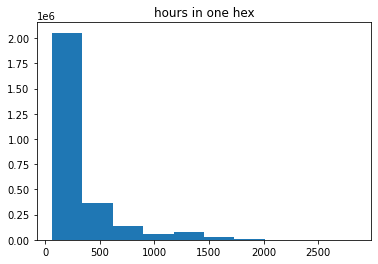

2848.516666666667  hours= 1.9781365740740742  days


In [31]:
plt.hist(tracks.time_spent)
plt.title('hours in one hex')
plt.show()
print(max(tracks.time_spent),' hours=',max(tracks.time_spent)/24/60,' days')

In [32]:
print(min(tracks['start_dttm']))
print(max(tracks['start_dttm']))


2023-03-02 00:00:19
2023-03-20 22:59:49


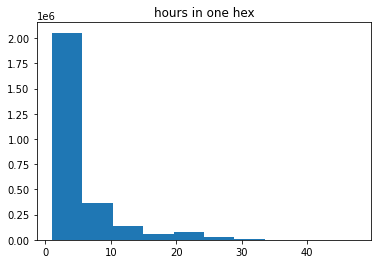

47.475277777777784  hours= 1.9781365740740742  days


In [33]:
plt.hist(tracks.time_spent/60)
plt.title('hours in one hex')
plt.show()
print(max(tracks.time_spent/60),' hours=',max(tracks.time_spent)/24/60,' days')

In [34]:
np.min(tracks['time_spent']) #inside one hex at least 1 hour time spent

60.0

In [35]:
time_average=pd.pivot_table(tracks,index=('id','h3_9'),values='time_spent',aggfunc='mean').reset_index()
time_average

,id,h3_9,time_spent
0,0,89110604c47ffff,94.066667
1,0,891106a9817ffff,155.795946
2,0,891106a9873ffff,109.741667
3,0,891106a987bffff,122.640278
4,0,891106a98a3ffff,91.800000
...,...,...,...
410447,773094113323,89110606447ffff,572.857692
410448,773094113323,89110606463ffff,84.650000
410449,773094113323,89110606477ffff,60.000000
410450,773094113323,8911060647bffff,73.033333


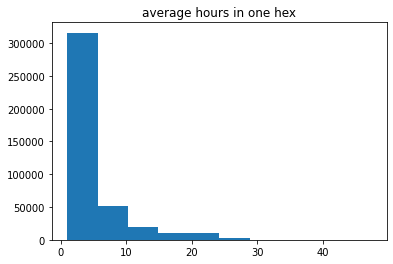

47.475277777777784  hours= 1.9781365740740742  days


In [36]:
plt.hist(time_average.time_spent/60)
plt.title('average hours in one hex')
plt.show()
print(max(time_average.time_spent/60),' hours=',max(time_average.time_spent)/24/60,' days')

In [37]:
time_average['count']=1
number_of_hex_per_id=pd.pivot_table(time_average,index='id',values='count',aggfunc=sum).reset_index()
number_of_hex_per_id

,id,count
0,0,6
1,1,2
2,2,7
3,3,4
4,4,5
...,...,...
41258,773094113317,1
41259,773094113320,1
41260,773094113321,4
41261,773094113322,6


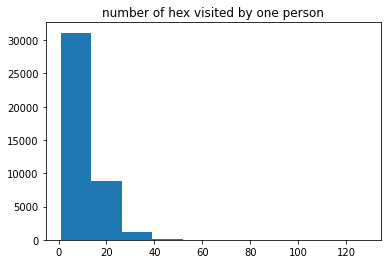

In [38]:
plt.hist(number_of_hex_per_id['count'])
plt.title('number of hex visited by one person')
plt.show()


In [39]:

number_of_hex_per_id.columns=['id','hex per one person']
number_of_hex_per_id.sort_values('hex per one person').head(-10)


,id,hex per one person
31061,575525618231,1
33230,618475290968,1
33220,618475290953,1
33217,618475290949,1
9204,171798691929,1
...,...,...
4948,85899346467,60
23312,438086664304,60
2051,34359738634,61
19492,360777253310,61


In [40]:


map1 = keplergl.KeplerGl(height=400, data={"data_1": tracks[tracks['id']==420906795148][['id','h3_9','time_spent']]})
orig_html = str(map1._repr_html_(),'utf-8')
b64d_html = base64.b64encode(orig_html.encode('utf-8')).decode('utf-8')
framed_html = f'<iframe src="data:text/html;base64,{b64d_html}" style="width:95%; height: 600px">'
import IPython
IPython.display.HTML(framed_html)


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [41]:
from datetime import datetime
tracks['current_date']=list(map(lambda x:pd.to_datetime(x).date(),tracks['start_dttm']))

In [42]:
tracks['count']=1
pd.pivot_table(tracks,index=('current_date'),values='count',aggfunc=sum).reset_index()

,current_date,count
0,2023-03-02,30788
1,2023-03-03,143673
2,2023-03-04,154108
3,2023-03-05,154182
4,2023-03-06,155726
5,2023-03-07,154915
6,2023-03-08,153056
7,2023-03-09,145443
8,2023-03-10,144108
9,2023-03-11,155056


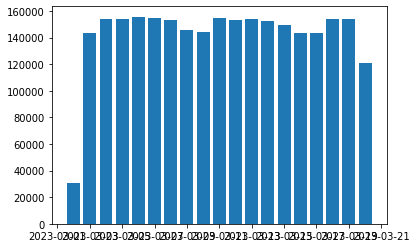

In [43]:
dates=pd.pivot_table(tracks,index=('current_date'),values='count',aggfunc=sum).reset_index()
plt.bar(dates['current_date'],dates['count'])
plt.show()

### Correct intersections

In [44]:
tracks=tracks.sort_values(by=['id','start_dttm'])
tracks['end_dttm_diff1']=[0]+list(tracks['end_dttm'])[:-1]
tracks['time_spent_bt_events']=list(map(lambda x,y:(x-y).total_seconds()/60 if y!=0 else 1,tracks['start_dttm'],tracks['end_dttm_diff1']))
tracks=tracks.reset_index()


In [45]:
def complex_check(ids,id1,idm1,tsbe,tsbe1,hexs,hex1,hexm1):
    if hexs==hex1 and ids==id1 and tsbe1==0 and (ids!=idm1 or hexs!=hexm1 or tsbe!=0):
        return 's'
    elif ids==id1 and ids==idm1 and hexs==hexm1 and hexs==hex1 and tsbe==0 and tsbe1==0:
        return 'c'
    elif ids==idm1 and hexs==hexm1 and tsbe==0 and (ids!=id1 or hexs!=hex1 or tsbe1!=0):
        return 'e'
    else:
        return 'n'
    

In [46]:
tracks['id1']=list(tracks['id'])[1:]+[0]
tracks['idm1']=[0]+list(tracks['id'])[:-1]
tracks['tsbe1']=list(tracks['time_spent_bt_events'])[1:]+[0]
tracks['hex1']=list(tracks['h3_9'])[1:]+[0]
tracks['hexm1']=[0]+list(tracks['h3_9'])[:-1]

In [47]:
tracks['complex_check']=list(map(complex_check,
                                 tracks['id'],
                                 tracks['id1'],
                                 tracks['idm1'],
                                 tracks['time_spent_bt_events'],
                                 tracks['tsbe1'],
                                 tracks['h3_9'],
                                 tracks['hex1'],
                                 tracks['hexm1']))
                        

In [48]:
tracks_ready=tracks[tracks['complex_check']=='n']

In [49]:
tracks_correct=tracks[tracks['complex_check']!='n']
tracks_correct=tracks_correct[tracks_correct['complex_check']!='c']
tracks_correct['start_dttm_diffm1']=[0]+list(tracks_correct['start_dttm'])[:-1]
tracks_correct=tracks_correct[tracks_correct['complex_check']=='e']
tracks_correct['start_dttm']=tracks_correct['start_dttm_diffm1']
del tracks_correct['start_dttm_diffm1']

tracks_ready=tracks_ready.append(tracks_correct)
tracks_ready=tracks_ready.sort_values(by=['id','start_dttm'])


In [50]:
tracks_ready.shape

(2012677, 46)

In [51]:
#(lat, lon) - find distance in km
def find_dist1(lat1,lon1,lat2,lon2):
    try:
        lat1=lat1/57.36049
        lat2=lat2/57.36049
        lon1=lon1/57.36049
        lon2=lon2/57.36049
        return 2*6371*np.arcsin((np.sin((lat2-lat1)/2)**2+np.cos(lat1)*np.cos(lat2)*np.sin((lon1-lon2)/2)**2)**0.5)

    except ValueError:
        return 0

In [52]:
tracks_ready['centroid_lon1']=[0]+list(tracks_ready['centroid_lon'])[:-1]
tracks_ready['centroid_lat1']=[0]+list(tracks_ready['centroid_lat'])[:-1]
tracks_ready['distance']=list(map(find_dist1,tracks_ready['centroid_lat'],tracks_ready['centroid_lon'],tracks_ready['centroid_lat1'],tracks_ready['centroid_lon1']))

In [53]:
tracks_ready['id1']=list(tracks_ready['id'])[1:]+[0]
tracks_ready['idm1']=[0]+list(tracks_ready['id'])[:-1]
tracks_ready['distance']=list(map(lambda d,idm1,ids: d if idm1==ids else 0,tracks_ready['distance'],tracks_ready['idm1'],tracks_ready['id']))


In [54]:
tracks_ready=tracks_ready[['id', 'start_dttm', 'end_dttm',
       'centroid_wkt', 'centroid_lon', 'centroid_lat', 'start_dttm_day',
       'h3_9', 'age', 'car_owners', 'carsharing_user', 'not_citizen_rf',
       'gender', 'healthy_food_inter', 'income', 'public_trnsprt_user',
       'pharmacies_inter', 'beauty_salon_inter', 'elite_sports_inter',
       'sprtswr_ftwr_inter', 'sprt_good_inter', 'trvl_rus', 'trvl_abrd',
       'sprt_fit_inter', 'hunting_fishing_inter', 'fashion_inter',
       'coffee_inter', 'med_serv_inter', 'education_inter', 'delivery_inter',
       'markets_inter', 'no_children', 'time_spent', 'current_date', 'count',
       'end_dttm_diff1', 'time_spent_bt_events', 'id1', 'idm1', 'tsbe1',
       'hex1', 'hexm1', 'complex_check', 'centroid_lon1', 'centroid_lat1',
       'distance']]

In [55]:
tracks_ready['current_date']=list(map(lambda x:pd.to_datetime(x).date(),tracks_ready['start_dttm']))


In [56]:
tracks_ready['end_dttm_diff1']=[0]+list(tracks_ready['end_dttm'])[:-1]
tracks_ready['time_spent_bt_events']=list(map(lambda x,y:(x-y).total_seconds()/60 if y!=0 else 1,tracks_ready['start_dttm'],tracks_ready['end_dttm_diff1']))
tracks_ready['time_spent_bt_events']=list(map(lambda d,idm1,ids: d if idm1==ids else 0,tracks_ready['time_spent_bt_events'],tracks_ready['idm1'],tracks_ready['id']))

In [57]:
tracks_ready['time_spent']=list(map(lambda x,y:(x-y).total_seconds()/60,tracks_ready['end_dttm'],tracks_ready['start_dttm']))


In [58]:
num_obs_by_id=pd.pivot_table(tracks_ready,index='id',values='count',aggfunc=sum).reset_index()
num_obs_by_id.columns=['id','num_obs_by_id']
tracks_ready=pd.merge(tracks_ready,num_obs_by_id,how='left',on='id')


In [59]:
tracks_ready=(tracks_ready[tracks_ready['num_obs_by_id']!=1])

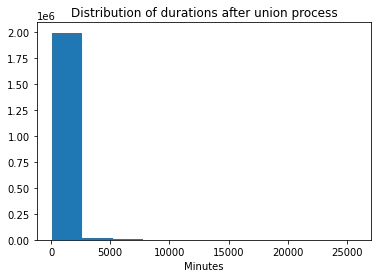

25791.2  hours= 17.910555555555558  days
6.0801355458372415  hours= 0.25333898107655173  days


In [60]:
plt.hist(tracks_ready.time_spent)
plt.title('Distribution of durations after union process')
plt.xlabel('Minutes')
plt.show()
print(max(tracks_ready.time_spent),' hours=',max(tracks_ready.time_spent)/24/60,' days')
print(np.mean(tracks_ready.time_spent)/60,' hours=',np.mean(tracks_ready.time_spent)/24/60,' days')

In [61]:
np.min(tracks_ready.time_spent)

60.0

In [62]:
tracks_ready['speed']=tracks_ready['distance']/(tracks_ready['time_spent_bt_events']/60)

In [63]:
tracks_ready.columns

Index(['id', 'start_dttm', 'end_dttm', 'centroid_wkt', 'centroid_lon',
       'centroid_lat', 'start_dttm_day', 'h3_9', 'age', 'car_owners',
       'carsharing_user', 'not_citizen_rf', 'gender', 'healthy_food_inter',
       'income', 'public_trnsprt_user', 'pharmacies_inter',
       'beauty_salon_inter', 'elite_sports_inter', 'sprtswr_ftwr_inter',
       'sprt_good_inter', 'trvl_rus', 'trvl_abrd', 'sprt_fit_inter',
       'hunting_fishing_inter', 'fashion_inter', 'coffee_inter',
       'med_serv_inter', 'education_inter', 'delivery_inter', 'markets_inter',
       'no_children', 'time_spent', 'current_date', 'count', 'end_dttm_diff1',
       'time_spent_bt_events', 'id1', 'idm1', 'tsbe1', 'hex1', 'hexm1',
       'complex_check', 'centroid_lon1', 'centroid_lat1', 'distance',
       'num_obs_by_id', 'speed'],
      dtype='object')

### Work with ommited observations


In [64]:
#самые популярные гексы
tracks_ready['count']=1
hex_pivot=pd.pivot_table(tracks_ready,index=('id','h3_9'),values='time_spent',aggfunc=sum).reset_index()
hex_pivot2=pd.pivot_table(hex_pivot,index='id',values='time_spent',aggfunc=max).reset_index()
hex_pivot2['max_time_spending']='max_time_spending'
hex_pivot=pd.merge(hex_pivot,hex_pivot2[['id','max_time_spending','time_spent']],on=('id','time_spent'),how='left')
hex_pivot=hex_pivot[hex_pivot['max_time_spending']=='max_time_spending'][['id','h3_9']]



In [65]:
hex_pivot=hex_pivot.drop_duplicates(subset='id')

In [66]:
hexdf=pd.DataFrame(tracks['h3_9'].drop_duplicates())


In [67]:
columns_to_fill_list=['h3_9', 'age', 'car_owners',
       'carsharing_user', 'not_citizen_rf', 'gender', 'healthy_food_inter',
       'income', 'public_trnsprt_user', 'pharmacies_inter',
       'beauty_salon_inter', 'elite_sports_inter', 'sprtswr_ftwr_inter',
       'sprt_good_inter', 'trvl_rus', 'trvl_abrd', 'sprt_fit_inter',
       'hunting_fishing_inter', 'fashion_inter', 'coffee_inter',
       'med_serv_inter', 'education_inter', 'delivery_inter', 'markets_inter',
       'no_children']

In [68]:
columns_to_fill=tracks[columns_to_fill_list]
columns_to_fill=columns_to_fill.replace(np.nan,-1)
for cl in columns_to_fill.columns[1:]:
    df=pd.pivot_table(columns_to_fill[columns_to_fill[cl]>=0],index='h3_9',values=cl,aggfunc=np.mean)
    hexdf=pd.merge(hexdf,df,how='left',on='h3_9')
    hexdf[cl]=hexdf[cl].replace(np.nan,columns_to_fill[columns_to_fill[cl]>=0][cl].mean())


In [69]:
iddf=pd.DataFrame(tracks['id'].drop_duplicates())
for cl in columns_to_fill_list[1:]:
    df=tracks[['id',cl]].drop_duplicates()
    iddf=pd.merge(iddf,df,how='left',on='id')
    


In [70]:
iddf=pd.merge(iddf,hex_pivot,how='left',on='id')


In [71]:
new_columns=['h3_9']
for index in hexdf.columns[1:]:
    new_columns.append(index+'_m')


In [72]:
hexdf.columns=new_columns

In [73]:
iddf=pd.merge(iddf,hexdf,how='left',on='h3_9')


In [74]:
iddf=iddf.replace(np.nan,-1)

In [75]:
for cl in columns_to_fill_list[1:]:
    iddf[cl]=list(map(lambda x,y:x if x>=0 else y,iddf[cl],iddf[cl+"_m"]))

In [76]:
tracks_ready=tracks_ready[['id', 'start_dttm', 'end_dttm', 'centroid_wkt', 'centroid_lon',
       'centroid_lat', 'start_dttm_day', 'h3_9',  'time_spent',
       'current_date', 'count', 'end_dttm_diff1', 'time_spent_bt_events',
       'id1', 'idm1', 'tsbe1', 'hex1', 'hexm1', 'complex_check',
       'centroid_lon1', 'centroid_lat1', 'distance', 'speed']]

In [77]:
tracks_ready=pd.merge(tracks_ready,iddf[['id','age', 'car_owners',
       'carsharing_user', 'not_citizen_rf', 'gender', 'healthy_food_inter',
       'income', 'public_trnsprt_user', 'pharmacies_inter',
       'beauty_salon_inter', 'elite_sports_inter', 'sprtswr_ftwr_inter',
       'sprt_good_inter', 'trvl_rus', 'trvl_abrd', 'sprt_fit_inter',
       'hunting_fishing_inter', 'fashion_inter', 'coffee_inter',
       'med_serv_inter', 'education_inter', 'delivery_inter', 'markets_inter',
       'no_children']],how='left',on='id')

In [78]:
tracks.drop_duplicates(subset='id').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41263 entries, 0 to 2716689
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   index                  41263 non-null  int64         
 1   Unnamed: 0             41263 non-null  int64         
 2   Unnamed: 0.1           41263 non-null  int64         
 3   id                     41263 non-null  int64         
 4   start_dttm             41263 non-null  datetime64[ns]
 5   end_dttm               41263 non-null  datetime64[ns]
 6   centroid_wkt           41263 non-null  object        
 7   centroid_lon           41263 non-null  float64       
 8   centroid_lat           41263 non-null  float64       
 9   start_dttm_day         41263 non-null  int64         
 10  h3_9                   41263 non-null  object        
 11  age                    38752 non-null  float64       
 12  car_owners             41263 non-null  int64         
 13 

In [79]:
lat_min = 59.804842
lat_max = 60.093279
lon_min = 30.094747
lon_max = 30.609159

In [80]:
tracks_ready['in spb']=list(map(lambda lat,lon:1 if (lat>=lat_min) & (lat<=lat_max) & (lon>=lon_min) & (lon<=lon_max) else 0,tracks_ready['centroid_lat'],tracks_ready['centroid_lon']))

In [81]:
tracks_ready=tracks_ready[tracks_ready['in spb']==1]

### EDA

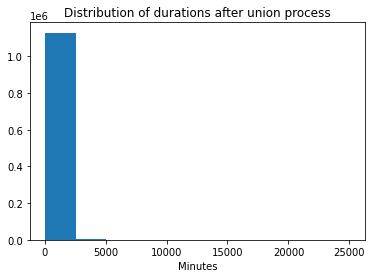

25018.966666666667  hours= 17.374282407407406  days
5.514368652600953  hours= 0.2297653605250397  days


In [82]:
plt.hist(tracks_ready.time_spent)
plt.title('Distribution of durations after union process')
plt.xlabel('Minutes')
plt.show()
print(max(tracks_ready.time_spent),' hours=',max(tracks_ready.time_spent)/24/60,' days')
print(np.mean(tracks_ready.time_spent)/60,' hours=',np.mean(tracks_ready.time_spent)/24/60,' days')

In [83]:
tracks_ready['dist from center']=tracks_ready['distance']=list(map(find_dist1,tracks_ready['centroid_lat'],tracks_ready['centroid_lon'],np.ones_like(tracks_ready['centroid_lat'].values)*59.9398,np.ones_like(tracks_ready['centroid_lat'].values)*30.3146))

In [84]:
tracks_ready['age']=list(map(lambda x: round(x,0),tracks_ready['age']))
tracks_ready['income']=list(map(lambda x: round(x,0),tracks_ready['income']))

In [85]:
pd.pivot_table(tracks_ready,index='income',values='dist from center',aggfunc='mean')

,dist from center
income,
1.0,10.236823
2.0,9.380052
3.0,9.113483
4.0,9.092579
5.0,8.813858


In [86]:
np.corrcoef(tracks_ready['age'],tracks_ready['dist from center'])

array([[ 1.        , -0.01167775],
       [-0.01167775,  1.        ]])

In [87]:
from scipy import stats
res = stats.shapiro(tracks_ready['dist from center'])
res.pvalue

c:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning:

p-value may not be accurate for N > 5000.



0.0

In [88]:
from scipy.stats import f_oneway
f_oneway(tracks_ready[tracks_ready['income']==1]['dist from center'],
         tracks_ready[tracks_ready['income']==2]['dist from center'],
         tracks_ready[tracks_ready['income']==3]['dist from center'],
         tracks_ready[tracks_ready['income']==4]['dist from center'],
         tracks_ready[tracks_ready['income']==5]['dist from center'])

F_onewayResult(statistic=3578.612416847312, pvalue=0.0)

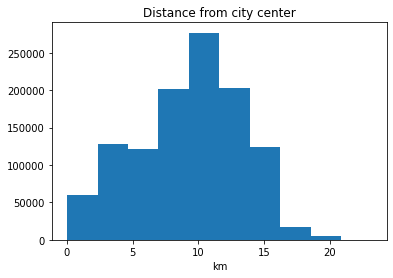

In [89]:
plt.hist(tracks_ready['dist from center'])
plt.title('Distance from city center')
plt.xlabel('km')
plt.show()

c:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:948: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

c:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:992: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

c:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:948: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

c:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:992: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later

c:\Users\Asus\AppData\Local\Programs\Python\Python37

Text(0.5, 0, 'km from center')

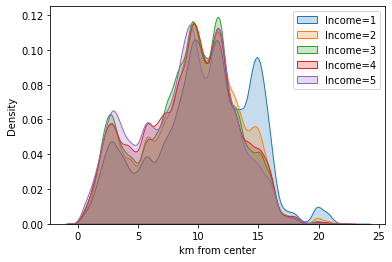

In [90]:
import seaborn as sns
sns.kdeplot(data=tracks_ready[tracks_ready['income']==1]['dist from center'],shade=True,  Label='Income=1')
sns.kdeplot(data=tracks_ready[tracks_ready['income']==2]['dist from center'],shade=True,  Label='Income=2')
sns.kdeplot(data=tracks_ready[tracks_ready['income']==3]['dist from center'], shade=True, Label='Income=3')
sns.kdeplot(data=tracks_ready[tracks_ready['income']==4]['dist from center'], shade=True, Label='Income=4')
sns.kdeplot(data=tracks_ready[tracks_ready['income']==5]['dist from center'],shade=True,  Label='Income=5')
plt.legend()
plt.xlabel('km from center') 

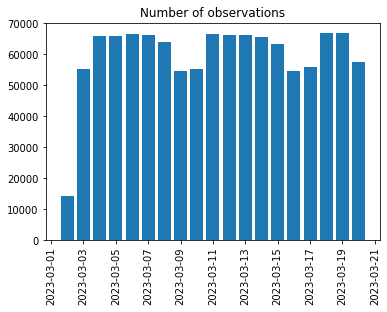

In [91]:
dates=pd.pivot_table(tracks_ready,index=('current_date'),values='count',aggfunc=sum).reset_index()
plt.bar(dates['current_date'],dates['count'])
plt.xticks(rotation=90)
plt.title('Number of observations')
plt.show()

In [92]:
tracks_ready['IWD']=list(map(lambda x:1 if x == dates.iloc[6:7,0:1].values else 0,tracks_ready['current_date']))

In [93]:
pd.pivot_table(tracks_ready,index='IWD',values='dist from center',aggfunc='mean')

,dist from center
IWD,
0,9.328415
1,9.188401


In [94]:
pd.pivot_table(tracks_ready,index='income',values='time_spent',aggfunc='mean')

,time_spent
income,
1.0,372.443522
2.0,341.618553
3.0,344.735025
4.0,288.996750
5.0,287.610668


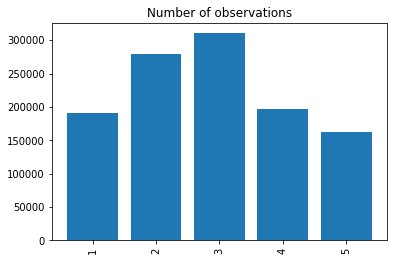

In [95]:
income=pd.pivot_table(tracks_ready,index=('income'),values='count',aggfunc=sum).reset_index()
plt.bar(income['income'],income['count'])
plt.xticks(rotation=90)
plt.title('Number of observations')
plt.show()

In [96]:
pd.set_option('display.max_columns', None)
only_id=tracks_correct.drop_duplicates(subset='id')
only_id.describe()

,index,Unnamed: 0,Unnamed: 0.1,id,centroid_lon,centroid_lat,start_dttm_day,age,car_owners,carsharing_user,not_citizen_rf,gender,healthy_food_inter,income,public_trnsprt_user,pharmacies_inter,beauty_salon_inter,elite_sports_inter,sprtswr_ftwr_inter,sprt_good_inter,trvl_rus,trvl_abrd,sprt_fit_inter,hunting_fishing_inter,fashion_inter,coffee_inter,med_serv_inter,education_inter,delivery_inter,markets_inter,no_children,time_spent,count,time_spent_bt_events,id1,idm1,tsbe1
count,3.972800e+04,3.972800e+04,3.972800e+04,3.972800e+04,39728.000000,39728.000000,39728.000000,37431.000000,39728.000000,39728.000000,39728.000000,39728.000000,39728.000000,34154.000000,39728.000000,39728.000000,39728.000000,39728.000000,39728.000000,39728.000000,39728.000000,39728.000000,39728.000000,39728.000000,39728.000000,39728.000000,39728.000000,39728.000000,39728.000000,39728.000000,39728.000000,39728.000000,39728.0,39728.0,3.972800e+04,3.972800e+04,39728.000000
mean,1.389069e+06,1.389069e+06,1.389069e+06,3.848686e+11,32.173778,59.364670,5.706504,45.060939,0.415349,0.152260,0.507274,0.460532,0.023988,2.419131,0.038688,0.477824,0.033679,0.009162,0.007904,0.103453,0.123590,0.024240,0.024366,0.023762,0.090641,0.091069,0.196209,0.260522,0.269281,0.438985,0.770640,522.758491,1.0,0.0,3.848694e+11,3.848686e+11,-224.908154
std,7.867596e+05,7.867596e+05,7.867596e+05,2.233852e+11,9.144154,2.297901,3.714589,14.239426,0.492788,0.359278,0.499953,0.498446,0.153014,1.391770,0.192853,0.499514,0.180404,0.095282,0.088552,0.304554,0.329118,0.153795,0.154184,0.152307,0.287102,0.287711,0.397134,0.438925,0.443592,0.496269,0.420426,452.781498,0.0,0.0,2.233852e+11,2.233852e+11,3624.311199
min,1.900000e+01,1.900000e+01,1.900000e+01,0.000000e+00,19.896444,41.926782,3.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,1.0,0.0,0.000000e+00,0.000000e+00,-26727.400000
25%,7.078388e+05,7.078388e+05,7.078388e+05,1.889786e+11,30.219517,59.741267,4.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,133.212500,1.0,0.0,1.889786e+11,1.889786e+11,0.000000
50%,1.402281e+06,1.402281e+06,1.402281e+06,3.865471e+11,30.372170,59.891653,4.000000,43.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,406.550000,1.0,0.0,3.865471e+11,3.865471e+11,40.691667
75%,2.077869e+06,2.077869e+06,2.077869e+06,5.755256e+11,30.522889,60.002085,6.000000,55.000000,1.000000,0.000000,1.000000,1.000000,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,750.000000,1.0,0.0,5.755256e+11,5.755256e+11,138.012500
max,2.716768e+06,2.716768e+06,2.716768e+06,7.730941e+11,160.845000,71.015556,20.000000,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2838.100000,1.0,0.0,7.730941e+11,7.730941e+11,22990.633333


# POIs

In [97]:
#here we need the result of "POIs - parsing" code 
pois=pd.read_csv('C:/Users/Asus/Downloads/Telegram Desktop/full_POIs.csv',sep=';',encoding='UTF8')



In [98]:
pois['cat_final']=list(map(lambda x,y: y.replace('/','') if x=='nan' else x.replace('/',''),pois['cat_final'],pois['category']))

In [99]:
pois['count']=1
pd.pivot_table(pois,index='cat_final',values='count',aggfunc=sum).reset_index().sort_values('count')

,cat_final,count
26,metro,72
58,upravlenie-obrazovaniem,81
31,pozharnye-chasti,108
41,sluzhby-spaseniia,109
9,cemetery,122
...,...,...
32,proizvodstvo-i-postavki,29740
59,uslugi,37912
12,eda-i-napitki,41712
48,stroitelstvo-i-remont,45760


In [100]:
pois=pois.drop_duplicates(subset=['link','cat_final'])

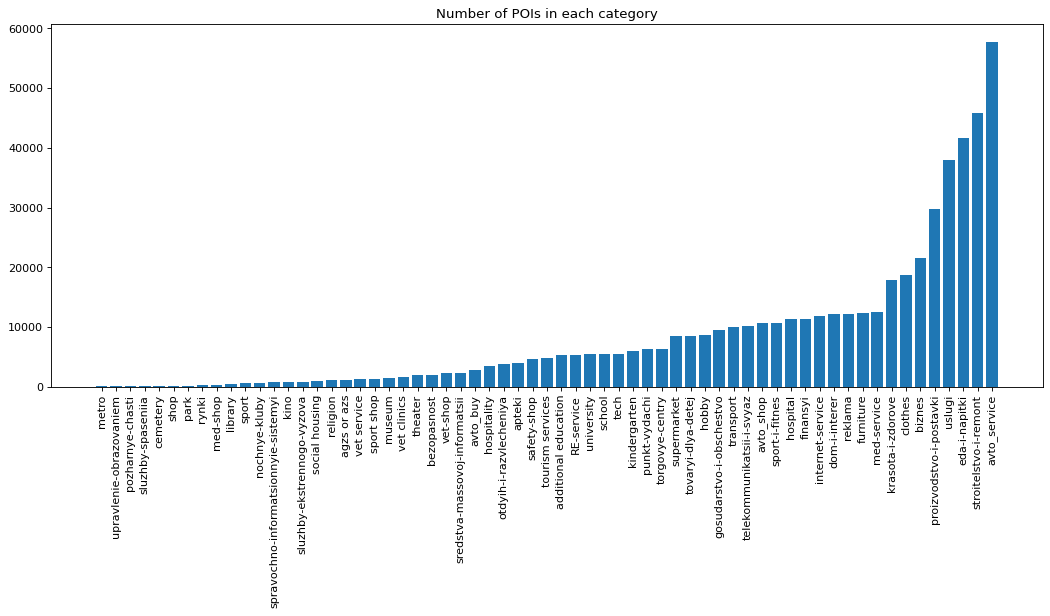

In [101]:
#самые распростарненные категории
plt.figure(figsize=(16, 6), dpi=80)
all_cats=pd.pivot_table(pois,index='cat_final',values='count',aggfunc=sum).reset_index().sort_values('count')
plt.bar(all_cats.cat_final.values,all_cats['count'].values)
plt.xticks(rotation=90)
plt.title('Number of POIs in each category')
plt.show()

In [102]:
top5=pd.pivot_table(pois,index='cat_final',values='count',aggfunc=sum).reset_index().sort_values('count').tail(5)
top5.columns=['cat_final','top5_cat']
top5['top5_cat']=1
pois=pd.merge(pois,top5,how='left',on='cat_final')

In [103]:
top5=pd.pivot_table(pois,index='cat_final',values='count',aggfunc=sum).reset_index().sort_values('count').head(5)
top5.columns=['cat_final','head5_cat']
top5['head5_cat']=1
pois=pd.merge(pois,top5,how='left',on='cat_final')

In [104]:
np.unique(pois[pois['head5_cat']==1]['cat_final'])

array(['cemetery', 'metro', 'pozharnye-chasti', 'sluzhby-spaseniia',
       'upravlenie-obrazovaniem'], dtype=object)

In [105]:
import keplergl
import base64
import IPython

map1 = keplergl.KeplerGl(height=400, data={"data_1":pois[pois['head5_cat']==1][['h3_9','count','cat_final']]})
orig_html = str(map1._repr_html_(),'utf-8')
b64d_html = base64.b64encode(orig_html.encode('utf-8')).decode('utf-8')
framed_html = f'<iframe src="data:text/html;base64,{b64d_html}" style="width:95%; height: 600px">'

IPython.display.HTML(framed_html)


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [106]:
pd.pivot_table(pois[pois['top5_cat']==1],index='h3_9',values='count',aggfunc=sum).reset_index().sort_values('count')

,h3_9,count
4013,8911063264bffff,1
5236,891106aa17bffff,1
2950,891106141b3ffff,1
5238,891106aa197ffff,1
2940,89110614123ffff,1
...,...,...
3096,89110614aafffff,311
5572,891106ab3c3ffff,311
2388,89110607383ffff,361
1792,8911060644fffff,392


In [107]:
pd.pivot_table(pois,index='h3_9',values='count',aggfunc=sum).reset_index().sort_values('count').tail(10)

,h3_9,count
1693,8911060607bffff,958
3267,89110614aafffff,965
5958,891106ab3c3ffff,968
1801,891106062b3ffff,971
1684,89110606053ffff,990
4507,891106a8157ffff,1002
69,8911060088fffff,1016
5209,891106a9657ffff,1097
1871,8911060644fffff,1492
1855,89110606407ffff,1610


In [108]:
import keplergl
import base64
import IPython
map1 = keplergl.KeplerGl(height=400, data={"data_1":pd.pivot_table(pois,index='h3_9',values='count',aggfunc=sum).reset_index().sort_values('count').tail(10),
                                           "data_2":pd.pivot_table(pois[pois['cat_final']=='metro'],index='h3_9',values='count',aggfunc=sum).reset_index()})
orig_html = str(map1._repr_html_(),'utf-8')
b64d_html = base64.b64encode(orig_html.encode('utf-8')).decode('utf-8')
framed_html = f'<iframe src="data:text/html;base64,{b64d_html}" style="width:95%; height: 600px">'

IPython.display.HTML(framed_html)


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [109]:
top_crowded=pd.pivot_table(pois,index='h3_9',values='count',aggfunc=sum).reset_index().sort_values('count').tail(10)
top_crowded.columns=['h3_9','top10_crowded']
top_crowded['top10_crowded']=1
pois=pd.merge(pois,top_crowded,how='left',on='h3_9')

In [110]:
pois['color']='#2E91E5'

In [111]:

import plotly.express as px

color_scale = [(0, 'orange'), (1,'red')]

fig1 = px.scatter_mapbox(pois[pois['top10_crowded']==1], 
                        lat="lat", 
                        lon="lon", 
                        hover_name="name", 
                        hover_data=["name"],
                        #color="Listed",
                        #color_continuous_scale=color_scale,
                        #size="Listed",
                        zoom=8, 
                        height=800,
                        width=800)

fig1.update_layout(mapbox_style="open-street-map")
fig1.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig2 = px.scatter_mapbox(pois[pois['cat_final']=='metro'], 
                        lat="lat", 
                        lon="lon", 
                        hover_name="name", 
                        hover_data=["name"],
                        color="count",
                        #color_continuous_scale=color_scale,
                        #size="Listed",
                        zoom=8, 
                        height=1000,
                        width=1000)

fig1.add_trace(fig2.data[0])
fig1.show()

Самый загруженный район - сенная площадь. В основном - различные услуги и мелкие ИП, также магазины одежды,общепит и услуги красоты

In [112]:
pd.pivot_table(pois[pois['top10_crowded']==1],index='cat_final',values='count',aggfunc=sum).sort_values(by='count').tail(10)

,count
cat_final,
tovaryi-dlya-detej,409
furniture,423
dom-i-interer,431
krasota-i-zdorove,504
avto_service,506
biznes,548
eda-i-napitki,621
stroitelstvo-i-remont,802
uslugi,811


### Time and top5  features

In [113]:
#оставлю только питер
tracks_ready=tracks_ready[tracks_ready['in spb']==1]

In [114]:
pois_pivot=pd.pivot_table(pois,index='h3_9',columns='new_sub_cat_code',values='count',aggfunc=sum).reset_index()
tracks_ready=pd.merge(tracks_ready,pois_pivot,how='left',on='h3_9')

In [115]:
#сделаю то же самое что было ранее, но с мЕньшим количеством наблюдений после урезки данных. Что делать, если человек где-то проводит одинаковое количество времени? Я решила
#присудить первенство по вхождению 
tracks_ready['count']=1
hex_pivot=pd.pivot_table(tracks_ready,index=('id','h3_9'),values='time_spent',aggfunc=sum).reset_index()
hex_pivot['top5']=hex_pivot.groupby('id')['time_spent'].rank(method='first',ascending=False)
hex_pivot['top5']=list(map(lambda x:x if x<6 else 0,hex_pivot['top5']))
hex_pivot.columns=['id', 'h3_9', 'time_spent_at_all', 'top5']
tracks_ready=pd.merge(tracks_ready,hex_pivot[['id','h3_9','time_spent_at_all','top5']],how='left',on=('id','h3_9'))
tracks_ready=tracks_ready.replace(np.nan,0)

1- night

2- morning

3- working hours 

4- evening

In [116]:
def detect_part_of_day(dttm):
    dttm=dttm.time()
    if (dttm>datetime.strptime('2023-03-03 19:00:00', '%Y-%m-%d %H:%M:%S').time()) & (dttm<datetime.strptime('2023-03-03 23:59:00', '%Y-%m-%d %H:%M:%S').time()):
        return 4
    if (dttm>datetime.strptime('2023-03-03 00:00:00', '%Y-%m-%d %H:%M:%S').time()) & (dttm<datetime.strptime('2023-03-03 06:00:00', '%Y-%m-%d %H:%M:%S').time()):
        return 1
    if (dttm>datetime.strptime('2023-03-03 06:00:00', '%Y-%m-%d %H:%M:%S').time()) & (dttm<datetime.strptime('2023-03-03 10:00:00', '%Y-%m-%d %H:%M:%S').time()):
        return 2
    if (dttm>datetime.strptime('2023-03-03 10:00:00', '%Y-%m-%d %H:%M:%S').time()) & (dttm<datetime.strptime('2023-03-03 19:00:00', '%Y-%m-%d %H:%M:%S').time()):
        return 3

    

In [117]:
tracks_ready['part_of_day_s']=list(map(detect_part_of_day,tracks_ready['start_dttm']))
tracks_ready['part_of_day_e']=list(map(detect_part_of_day,tracks_ready['end_dttm']))

In [118]:
def detect_part_of_day_2(dttm_s,dttm_e,what_return):
    dttm_s=dttm_s.time()
    dttm_e=dttm_e.time()
    numeric_version_s=float(str(dttm_s).split(':')[0])+0.01*float(str(dttm_s).split(':')[1])
    numeric_version_e=float(str(dttm_e).split(':')[0])+0.01*float(str(dttm_e).split(':')[1])
    timeline_time=np.array([0,6,10,19,24])
    time_diff_s=timeline_time-numeric_version_s
    time_diff_e=timeline_time-numeric_version_e
    index_s=np.where(time_diff_s>=0)[0][0]
    index_e=np.where(time_diff_e<=0)[0][-1]
    if what_return==1:
        return round(time_diff_s[index_s],2)
    else:
        return round(time_diff_e[index_e],2)

In [119]:
tracks_ready['part_of_day_s_len']=list(map(detect_part_of_day_2,tracks_ready['start_dttm'],tracks_ready['end_dttm'],np.ones((len(tracks_ready)))))
tracks_ready['part_of_day_e_len']=list(map(detect_part_of_day_2,tracks_ready['start_dttm'],tracks_ready['end_dttm'],2*np.ones((len(tracks_ready)))))

In [120]:
def detect_part_of_day_f(part_s,part_e,part_s_len,part_e_len,time_spent):
    if (abs(part_e-part_s)<=1):
        if part_s_len>=abs(part_e_len):
            return part_s
        else:
            return part_e
    elif time_spent/60>24:
        return "whole day" #morning and working hours
    else:
        if (part_s==1)or((part_s==4)):
            return 'whole day end' #night and evening
        else:
            return 'whole day'
        

In [121]:
tracks_ready['final_part_of_day']=list(map(detect_part_of_day_f,tracks_ready['part_of_day_s'],tracks_ready['part_of_day_e'],tracks_ready['part_of_day_s_len'],tracks_ready['part_of_day_e_len'],tracks_ready['time_spent']))
tracks_ready['final_part_of_day_in_word']=tracks_ready['final_part_of_day'].replace(1,'night').replace(2,'morning').replace(3,'working hours').replace(4,'evening')

<AxesSubplot:xlabel='top5', ylabel='final_part_of_day_in_word'>

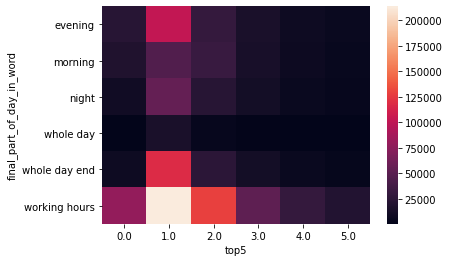

In [122]:
import seaborn as sns
sns.heatmap(pd.pivot_table(tracks_ready,index='final_part_of_day_in_word',columns='top5',values='count',aggfunc=sum)) 


<AxesSubplot:xlabel='top5', ylabel='final_part_of_day_in_word'>

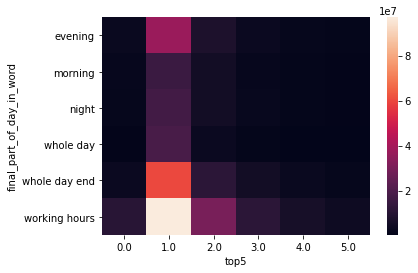

In [123]:
import seaborn as sns
sns.heatmap(pd.pivot_table(tracks_ready,index='final_part_of_day_in_word',columns='top5',values='time_spent',aggfunc=sum)) 


In [124]:
hex_pivot=pd.pivot_table(tracks_ready,index=('id','h3_9'),values='count',aggfunc=sum).reset_index()
hex_pivot['top5_fr']=hex_pivot.groupby('id')['count'].rank(method='first',ascending=False)
hex_pivot['top5_fr']=list(map(lambda x:x if x<6 else 0,hex_pivot['top5_fr']))
hex_pivot_2=pd.pivot_table(tracks_ready,index=('id'),values='count',aggfunc=sum).reset_index()
hex_pivot=pd.merge(hex_pivot,hex_pivot_2,how='left',on='id')
hex_pivot['level_of_visit%']=hex_pivot['count_x']/hex_pivot['count_y']*100
hex_pivot.columns=['id', 'h3_9', 'number of visits of hex', 'top5_fr', 'count_y', 'level_of_visit%']



In [125]:
tracks_ready=pd.merge(tracks_ready,hex_pivot[['id','h3_9','level_of_visit%','top5_fr','number of visits of hex']],how='left',on=('id','h3_9'))
tracks_ready=tracks_ready.replace(np.nan,0)

In [126]:
hex_pivot=pd.pivot_table(tracks_ready,index=('id','h3_9'),values='time_spent',aggfunc=np.mean).reset_index()
hex_pivot['top5_avr']=hex_pivot.groupby('id')['time_spent'].rank(method='first',ascending=False)
hex_pivot['top5_avr']=list(map(lambda x:x if x<6 else 0,hex_pivot['top5_avr']))
hex_pivot.columns=['id', 'h3_9', 'time_spent_avr', 'top5_avr']
tracks_ready=pd.merge(tracks_ready,hex_pivot[['id','h3_9','time_spent_avr','top5_avr']],how='left',on=('id','h3_9'))
tracks_ready=tracks_ready.replace(np.nan,0)

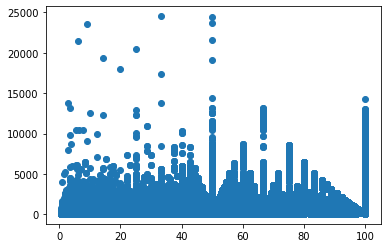

In [127]:
plt.scatter(tracks_ready['level_of_visit%'],tracks_ready['time_spent_avr'])
plt.show()

In [129]:
hex_pivot=pd.pivot_table(tracks_ready,index=('id','h3_9'),columns='current_date',values='count',aggfunc=sum).reset_index().replace(np.nan,0)
hex_pivot.iloc[:,2:]=hex_pivot.iloc[:,2:].values/hex_pivot.iloc[:,2:].values
hex_pivot=hex_pivot.replace(np.nan,0)
hex_pivot['num of days appear']=np.sum(hex_pivot.iloc[:,2:],axis=1)
hex_pivot['num of days appear fr']=hex_pivot['num of days appear'].values/(len(hex_pivot.columns)-3)
tracks_ready=pd.merge(tracks_ready,hex_pivot[['id','h3_9','num of days appear','num of days appear fr']],how='left',on=('id','h3_9'))
tracks_ready=tracks_ready.replace(np.nan,0)

c:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning:

invalid value encountered in true_divide



In [130]:
tracks_ready['number of visits of hex per day']=round(tracks_ready['number of visits of hex']/tracks_ready['num of days appear'])


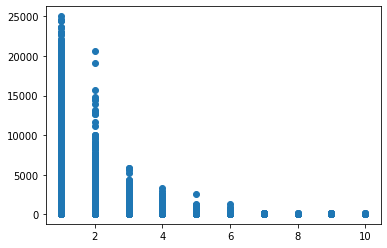

In [131]:
plt.scatter(tracks_ready['number of visits of hex per day'],tracks_ready['time_spent'])

<AxesSubplot:xlabel='number of visits of hex per day', ylabel='final_part_of_day_in_word'>

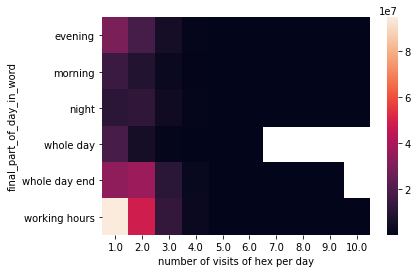

In [132]:

sns.heatmap(pd.pivot_table(tracks_ready,index='final_part_of_day_in_word',columns='number of visits of hex per day',values='time_spent',aggfunc=sum)) 

In [133]:
tracks_ready['time_spent_avr_h']=tracks_ready['time_spent_avr']/60

<AxesSubplot:xlabel='time_spent_avr_h', ylabel='Count'>

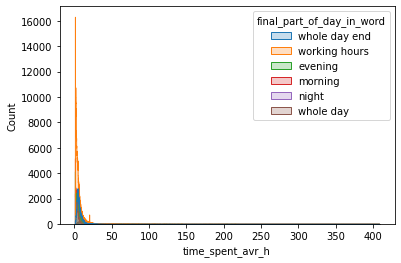

In [134]:
sns.histplot(tracks_ready, x="time_spent_avr_h", hue="final_part_of_day_in_word", element="step")

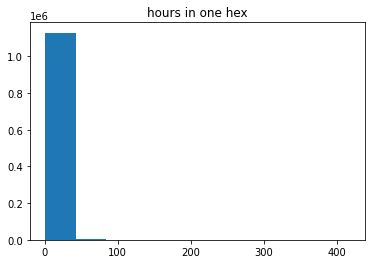

416.9827777777778  hours= 17.374282407407406  days
5.51436865260095  hours= 0.2297653605250397  days


In [135]:
plt.hist(tracks_ready.time_spent/60)
plt.title('hours in one hex')
plt.show()
print(max(tracks_ready.time_spent/60),' hours=',max(tracks_ready.time_spent)/24/60,' days')
print(np.mean(tracks_ready.time_spent/60),' hours=',np.mean(tracks_ready.time_spent)/24/60,' days')

In [136]:
tracks_ready['weekend']=list(map(lambda x: 1 if x.weekday()>4 else 0,tracks_ready['current_date']))

<AxesSubplot:xlabel='weekend', ylabel='final_part_of_day_in_word'>

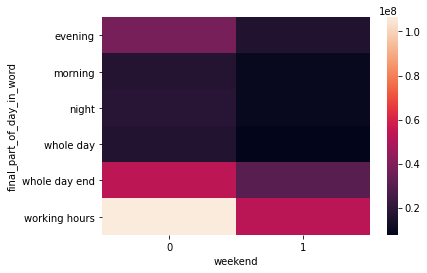

In [137]:
sns.heatmap(pd.pivot_table(tracks_ready,index='final_part_of_day_in_word',columns='weekend',values='time_spent',aggfunc=sum)) 

top5 - просто суммарно кол-во проведенного времени в гексе. может быть как набрано отдельными наблюдениями, так и одним непрерывным пребыванием

top-fr - по частоте появления, где чаще всего мелкает

top5_avr - по среднему времени пребывания в гексе

Интересно, как часты случаи, когда top5 на самом деле не самый частопосещаемый? Или не первый по времени пребывания?

In [138]:
pd.pivot_table(tracks_ready,index='top5',values=('top5_fr','top5_avr'),aggfunc=np.mean)

,top5_avr,top5_fr
top5,,
0.0,0.515746,0.949932
1.0,1.568478,1.108195
2.0,2.394832,1.857413
3.0,2.419710,2.677299
4.0,2.193329,3.102088
5.0,2.112597,2.992217


In [139]:

import keplergl
import base64
map1 = keplergl.KeplerGl(height=400, data={"data_1":tracks_ready[['h3_9','time_spent_avr']][tracks_ready['top5_avr']==1].drop_duplicates(subset=['h3_9','time_spent_avr'])})
orig_html = str(map1._repr_html_(),'utf-8')
b64d_html = base64.b64encode(orig_html.encode('utf-8')).decode('utf-8')
framed_html = f'<iframe src="data:text/html;base64,{b64d_html}" style="width:95%; height: 600px">'
import IPython
IPython.display.HTML(framed_html)


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter
